# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import gridspec

# 1.0. Exploratory Data Analysis

In [2]:
#Dataset upload from URL
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

## 1.1. Data Description

In [3]:
#Visualization of the first 05 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
def data_shape(data):
    print("Shape of the dataset")
    print("\nNumber of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
    
    return None

def num_attributes(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe number of attribute is:", num_attributes)
    
    return num_attributes

def attributes(data):
    attributes = data.drop(['id','date'], axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def data_info(data):
    print("\n\nData types\n")
    data.info()
    
    return None

def descriptive_analysis(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print("\n\nDescriptive analysis:\n\n",data.describe().T)
    
    return None

def display(data):
    #Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
    print("\n\nAttributes unique values")
    print("\n\nUnique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
    print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
    print("\nUnique values for floors:", np.sort(data['floors'].unique()))
    print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
    print("\nUnique values for view:", np.sort(data['view'].unique()))
    print("\nUnique values for condition:", np.sort(data['condition'].unique()))
    print("\nUnique values for grade:", np.sort(data['grade'].unique()))

    print("\n\nWhile there are properties with 33 bedrooms, also are there with 0. The same happens with the number of bathrooms. This would properly be classified as inconsistences, yet I choose to classify into different types of properties in this analysis.")
    print("\n\nThe other attributes contain a large number of unique values, such as 'id' - as it may be seen below. Thus, they were not considered in this analysis.")

    print("\n\nNumber of unique values for 'id':", data['id'].nunique())
    print("\n\nWhile the number of rows is 21613, the number of unique 'id' is 21436. It means there are only 21436 properties.")
    
    return None

if __name__ == '__main__':
    
    data_shape(data)
    
    num_attributes = num_attributes(data)
    
    attributes = attributes(data)
    
    data_info(data)
    
    descriptive_analysis(data)
    
    display(data)

Shape of the dataset

Number of rows: 21613
Number of columns: 21


The number of attribute is: 19


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  in

**Meaning of the attributes**

- ID: identification number
- date: period in which the properties were available
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- floors: number of floors
- waterfront: if some property has waterfront or not (0 or 1)
- view: number of views
- condition: condition of the properties (1 to 5)
- grade: quality of the building and construction level
- price: price of the property
- sqft_living: living room built area [ft²]
- sqft_lot: lot area [ft²]
- sqft_above: built area above ground level [ft²]
- sqft_basement: built basement area [ft²]
- yr_built: year that the property was built
- yr_renovated: year of renovation
- sqft_living15: average built area of the 15 nearest neighboring properties [ft²]
- sqft_lot15: average lot area of the 15 nearest neighboring properties [ft²]
- zipcode: number of zipcode
- lat: latitude identification number
- long: longitude identification number

## 1.2. Data Cleaning

In [5]:
def missing_values(data):
    print("Missing values\n")
    print(data.isna().sum())
    
    return None

def ids(data):
    ids = data['id']
    
    return ids

def duplicates_id(data):
    print("\n\nDuplicates\n")
    print(data[ids.isin(ids[ids.duplicated()])].sort_values('id'))
    
    return None

if __name__ == '__main__':
    
    missing_values(data)
    
    ids = ids(data)
    
    duplicates_id(data)

Missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Duplicates

               id             date     price  bedrooms  bathrooms  \
2497      1000102  20150422T000000 300000.00         6       3.00   
2496      1000102  20140916T000000 280000.00         6       3.00   
16814     7200179  20141016T000000 150000.00         2       1.00   
16815     7200179  20150424T000000 175000.00         2       1.00   
11434   109200390  20141020T000000 250000.00         3       1.75   
...           ...              ...       ...       ...        ...   
6345   9828200460  20140627T000000 260000.00         2       1.00   
15200 

Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time. 

It is important to mention that the number of duplicates is different from the number of ids that are duplicates. Notice that the same id appears twice or more. Thus, the number of ids that are duplicate is: total number of rows - number of unique ids = 177.

## 1.3. Data Conversion

In [6]:
#Conversiong to datetime
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers 

We may have a look at the outliers in the dataset using the boxplot chart. However, as it may be seen below, this is an univariate analysis. As the price is influenced by a lot of features in the dataset, we must remove outliers using multivariate analysis. 

Text(0, 0.5, 'Price (USD)')

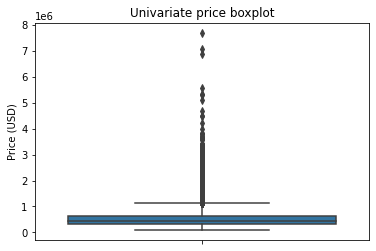

In [7]:
ax = sns.boxplot(y='price',data=data)
ax.set_title("Univariate price boxplot")
ax.set_ylabel("Price (USD)")

To remove outliers using multivariate analysis, we are going to use three methods: **visual method**, **Z-score method** and **interquartile range method**. Then, we are going to work *separately* with each resulting dataset and make conclusions.  

Firstly, in order to use the methods **Z-score** and **interquartile range**, we have to set the column 'date' as integer as follows:

In [ ]:
#Setting the feature 'date' as integer (type 1)
df1 = data
df1['date'] = df1['date'].astype(np.int64)

In [ ]:
#Setting the feature 'date' as integer (type 2)
df1 = data
df1['date'] = df1['date'].view(np.int64)

The dataset df1 is the same in the two cases above. It was only treated with two different "set as integer" functions.

### 1.4.1. Visual method

In [ ]:
#Properties with the highest prices
data.sort_values('price', ascending=False).head(15)

The properties with the highest prices have such values due to their features. No anomalies were found to be considered as outliers. 

In [ ]:
#Properties with 10 or more than 10 bedrooms
data[data['bedrooms'] >= 10]

The prices of the properties above are all feasible with their features. Although perhaps the 11-bedrooms and the 33-bedrooms properties prices may be seen as anomalies, they will not be treated as outliers due to their year built (yr_built) and total area (sqft_lot). Some of their features may be atypical because of the time they were built and localization.  

In [ ]:
#Properties with no bedrooms
data[data['bedrooms'] == 0]

Although some properties have no bedrooms, they may be treated as studios and not as apartments or even houses. They are considered like this and not as outliers due to requests from the House Rocket's CEO. 

In [ ]:
#Properties with 6 or more than 6 bathrooms
data[data['bathrooms'] >= 6]

The prices of the properties above are all consistent with their features. Thus, they will not be treated as outliers.

In [ ]:
#Properties with no bathrooms
data[data['bathrooms'] == 0]

The properties above - with no bathrooms - will be treated as outliers, since there is not a classification for them. Assuming they are a typo, these rows will be removed. 

#### 1.4.1.1 Dropouts

In [ ]:
def drop_rows(data):
    data = data.drop(data[data['bathrooms'] == 0].index)
    
    return data

def reset_index(data):
    data = data.reset_index(drop=True)
    dataset = data.copy()
    
    return data, dataset

def show_dimensions(data):
    print(f"Clean dataset: {data.shape[0]} properties (rows), {data.shape[1]} features (columns).")
    
    return None

if __name__ == '__main__':
    
    data = drop_rows(data)
    
    data, dataset = reset_index(data)
    
    show_dimensions(data)

### 1.4.2. Z-score method

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured."

"The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution."

"Calculating the Z-score, we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers." 

In this case (project), a threshold of 3 was used. For instance, when the Z-score value was greater than 3, that data point was identified as an outlier.

In [ ]:
def standardization_data(df1):
    z1 = np.abs(stats.zscore(df1))
    print("Standardized dataset:\n\n", z1)
    
    return z1

def show_index_outliers(z1):
    #Defining threshold as 3
    threshold = 3
    
    print("\n\nIndexes of the outliers:\n\n",np.where(z1 > 3))
    
    return None

def show_first_outlier(z1):
    print("\n\nValue of the first outlier:\n\n",z1.iloc[1][15])
    
    return None

def removing_outliers(df1, z1):
    df2 = df1[(z1 < 3).all(axis=1)]
    
    return df2

def show_new_shape(df2):
    print("\n\nShape of the clean dataset:\n\nNumber of rows:", df2.shape[0])
    print("Number of columns:", df2.shape[1])
    
    return None

if __name__ == '__main__':
    
    z1 = standardization_data(df1)
    
    show_index_outliers(z1)
    
    show_first_outlier(z1)
    
    df2 = removing_outliers(df1, z1)
    
    show_new_shape(df2)

### 1.4.3. Interquartile range (IQR) method

Box plot use the IQR method to display data and outliers(shape of the data). The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

"It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

In [ ]:
def quartiles(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    
    return Q1, Q3

def IQR_function(Q1, Q3):
    IQR = Q3 - Q1
    print("Interquartile range:\n\n",IQR)
    
    return IQR

def show_boolean_outliers(df1, Q1, Q3, IQR):
    print("\n\nBoolean values:\n\n",(df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))
    
    return None

def removing_outliers(df1, Q1, Q3, IQR):
    df3 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df3

def show_dimensions_dataset(df3):
    print("\n\nShape of the clean dataset:\n\n",df3.shape)
    
    return None

if __name__ == '__main__':
    
    Q1, Q3 = quartiles(df1)
    
    IQR = IQR_function(Q1, Q3)
    
    show_boolean_outliers(df1, Q1, Q3, IQR)
    
    df3 = removing_outliers(df1, Q1, Q3, IQR)
    
    show_dimensions_dataset(df3)

### 1.4.4. Outliers choice

After tested the three methods to identify and remove outliers, I decided to choose the **visual method**. The choice was made based on number of rows which were removed, since the **Z-score and IQR methods** overexcluded the elements in the dataset without consider particular features of each property. 

# 2.0. Feature Selection

## 2.1. Questions and Requests (Q&R)

In order to find the most important attributes related to the price and hence improving the decision making, House Rocket's CEO created 7 sets of questions and requests. 

### 2.1.1. Q&R 1.0

1. How many properties are available for purchase?
2. How many attributes do properties have?
3. What are the attributes of the properties?
4. What is the most expensive property? (with the highest sale price)
5. What property has the largest number of bedrooms?
6. What is the total sum of the number of bedrooms in the dataset?
7. How many properties have two bathrooms?
8. What is the average price of all properties in the dataset?
9. What is the average price of the properties with two bathrooms?
10. What is the minimum price for the 3-bedrooms properties?
11. How many properties have more than 300 square meters in the living room?
12. How many properties have more than two floors?
13. How many properties have a waterfront?
14. Among properties with a waterfront, how many have three bedrooms?
15. Among properties with more than 300 square meters in the living room, how many have more than two bathrooms?

In [ ]:
def question_one(data):
    num = data['id'].nunique()
    print("There are ", num," properties available for purchase.")
    
    return num

def question_two(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe properties have ",num_attributes," attributes")
    
    return num_attributes

def question_three(data):
    attributes = data.drop(['id','date'],axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def question_four(data):
    m_e_h = data[['id','price']].sort_values('price',ascending=False)
    print("\n\nMost expensive properties:\n")
    print(m_e_h)

    most_expensive = data[['id','price']].sort_values('price',ascending=False).iloc[0,0]
    print("\n\nThe most expensive property has the id:",most_expensive)
    
    return m_e_h, most_expensive

def question_five(data):
    m_n_h = data[['id','bedrooms']].sort_values('bedrooms',ascending=False)
    print("\n\nThe property with the largest number of bedrooms is in the first line:\n\n",m_n_h)
    
    return m_n_h

def question_six(data):
    sum_bedrooms = data['bedrooms'].sum()
    print("\n\nThe dataset total sum of bedrooms is:",sum_bedrooms)
    
    return sum_bedrooms

def question_seven(data):
    dataframe = data.loc[data['bathrooms'] ==2,:]
    number = len(dataframe)
    print("\n\nThe number of properties with two bathrooms is:", number)
    
    return dataframe
    
def question_eight(data):
    average_price = np.round(data['price'].mean(),2)
    print("\n\nThe average price of all properties is: ${}".format(average_price))
    
    return average_price

def question_nine(data):
    avg_bath = np.round(data.loc[data['bathrooms']==2,'price'].mean(),2)
    print("\n\nThe average price of the properties with 02 bathrooms is: ${}".format(avg_bath))
    
    return avg_bath

def question_ten(data):
    min_price = np.round(data.loc[data['bedrooms']==3,'price'].min(),2)
    print("\n\nThe minimum price of a 03-bedrooms property is: ${}".format(min_price))
    
    return min_price

def question_eleven(data):
    more_300 = data.loc[data['sqft_living']>300,:]
    num_ = len(more_300)
    #print("\n\nThe number of properties with more than 300 m² is:",num_)

    num_ = data.loc[data['sqft_living']>300,:].shape[0]
    print("\n\nThe number of properties with more than 300 m² is:",num_)
    
    return more_300, num_

def question_twelve(data):
    two_floors = data.loc[data['floors']>2,:].shape[0]
    print("\n\nThe number of properties with more than 02 floors is:", two_floors)
    
    return two_floors

def question_thirteen(data):
    water_front = data.loc[data['waterfront']>0,:].shape[0]
    print("\n\nThe number of properties with waterfront view is:",water_front)
    
    return water_front

def question_fourteen(data):
    water_three = data.loc[(data['waterfront']>0) & (data['bedrooms']==3),:].shape[0]
    print("\n\nThe number of properties with waterfront view and more than 03 bedrooms is:",water_three)
    
    return water_three

def question_fifteen(data):    
    houses = data.loc[(data['sqft_living']>300) & (data['bathrooms']>2),:].shape[0]
    print("\n\nThe number of properties with more than 300 m² and more than 02 bathrooms is:",houses)
    
if __name__ == '__main__':
    
    num =  question_one(data)

    num_attributes = question_two(data)

    attributes = question_three(data)

    m_e_h, most_expensive = question_four(data)

    m_n_h = question_five(data)
    
    sum_bedrooms = question_six(data)

    dataframe = question_seven(data)
    
    average_price = question_eight(data)
    
    avg_bath = question_nine(data)
 
    min_price = question_ten(data)

    num_ = question_eleven(data)

    two_floors = question_twelve(data)

    water_front = question_thirteen(data)

    water_three = question_fourteen(data)
  
    houses = question_fifteen(data)   

### 2.1.2. Q&R 2.0

1. What is the date of the oldest property in the portfolio?
2. How many properties have the maximum number of floors?
3. Create a low and high standard classification for properties:
   - High standard: above USD 540000.00.
   - Low standard: below USD 540000.00.
4. Make a report (.csv file) ordered by price with the following information:
   - Property ID;
   - Date the property became available for purchase;
   - Number of bedrooms;
   - Total land size;
   - Price;
   - Property classification.
5. A map where the houses are located geographically.

In [ ]:
def data_types(data):
    print("Data types\n\n",data.dtypes)
    
    return None

def conversion_date(data):
    data['date'] = pd.to_datetime(data['date'])
    
    return data

def question_one(data):
    min_port = data['date'].min()
    print("\n\nThe earliest date which a property became available for purchase in the portfolio is:",min_port)
    
    return min_port

def question_two(data):
    max_floors = data[data['floors'] == 3.5].shape[0]
    print(f"\n\n{max_floors} properties have the maximum number of floors.")
    
    return max_floors

def question_three(data):
    data['classification'] = 'NA'
    print("\n\nCreation of the classification column:\n\n",data.columns)
    data.loc[data['price'] > 540000, 'classification'] = "high_standard"
    data.loc[data['price'] < 540000, 'classification'] = "low_standard"
    print("\n\n",data.head())
    
    return data

def question_four(data):    
    report = data[['id','date','bedrooms','sqft_lot','price','classification']].sort_values('price',ascending=False)
    print("\n\nReport:\n\n",report)
    report.to_csv("report.csv",index=False)
    
    return report

#def question_five(data):
#    data_map = data[['id','lat','long','price']]
#    fig_map = px.scatter_mapbox(data_map, lat='lat', lon='long', hover_name='id', hover_data =['price'], zoom = 3, height = 300)

#    fig_map.update_layout(mapbox_style ='open-street-map', height = 600, margin = {"r": 0, "l": 0, "t": 0, "b": 0})
    
#    print("\n\nMap\n\n")

#    fig_map.show()
    
#    fig_map.write_html("first_map.html")
    
#    return data_map, fig_map

if __name__ == '__main__':
    data_types(data)
    
    data = conversion_date(data)
    
    min_port = question_one(data)
    
    max_floors = question_two(data)
    
    data = question_three(data)
    
    report = question_four(data)
    
#    data_map, fig_map = question_five(data)

The map made was too big to be visualized on *GitHub*. That's why the question five was marked with "#" to avoid its answer. Yet, the code lines are still available above.

As an alternative solution, the map was deployed to Heroku: [Property map.](https://property-map-quemelli-lucas.herokuapp.com/). The script to this procedure may be found in the folders named "Q&R => Q&R 2.0".

### 2.1.3. Q&R 3.0

1. Create a column called: house_age. 
   - If the value of the column "date" is greater than 2014-01-01 => 'new_house'.
   - If the value of the column "date" is less than 2014-01-01 => 'old_house'.  
2. Create a column called: dormitory_type.
   - If the value of the column "bedrooms" is equal to 1 => 'studio'.
   - If the value of the column "bedrooms" is equal to 2 => 'apartment'.
   - If the value of the column "bedrooms" is greater than 2 => 'house'.
3. Create a column called: condition_type.
   - If the value of the column "condition" is less than or equal to 2 => 'bad'.
   - If the value of the column "condition" is equal to 3 or 4 => 'regular'.
   - If the value of the column "condition" is equal to 5 => 'good'.
4. Change the type of the column "condition" to string.
5. Delete the columns: sqft_living15 and sqft_lot15.
6. Change the type of the column "yr_built" to date.
7. Change the type of the column "yr_renovated" to date.
8. What is the earliest construction date of a property?
9. What is the earliest date for renovation of a property?
10. How many properties have 2 floors?
11. How many properties have the "condition_type" equals to 'regular'?
12. How many properties have the "condition_type" equals to 'bad' and have a water view?
13. How many properties have the "condition_type" equals to 'good' and "house_age" equals to 'new_house'?
14. What is the price of the most expensive property of the "dormitory_type" which is equal to 'studio'?
15. How many properties of the type 'apartment' were renovated in 2015?
16. What is the maximum number of "bedrooms" that a property of the type 'house' has?
17. How many properties of the type 'new_house' were renovated in 2014?
18. Select some columns by their names, by their index and by boolean indexing. 
19. Save a .csv file with columns 10 through 17 only.

In [ ]:
def question_one(data):
    data['house_age'] = 'NA'
    data.loc[data['date'] > '2014-01-01', 'house_age'] = "new_house"
    data.loc[data['date'] < '2014-01-01', 'house_age'] = "old_house"
    print("New dataset with column 'house_age':\n\n",data.head())
    
    return data

def question_two(data):
    data['dormitory_type'] = 'NA'
    data.loc[data['bedrooms'] == 1, 'dormitory_type'] = "studio"
    data.loc[data['bedrooms'] == 2, 'dormitory_type'] = "apartment"
    data.loc[data['bedrooms'] > 2, 'dormitory_type'] = "house"
    print("\n\nNew dataset with the column 'dormitory_type':\n\n",data.head())
    
    return data

def question_three(data):
    data['condition_type'] = 'NA'
    data.loc[data['condition'] <= 2, 'condition_type'] = "bad"
    data.loc[(data['condition'] == 3) | (data['condition'] == 4), 'condition_type'] = "regular"
    data.loc[data['condition'] >= 5, 'condition_type'] = "good"
    print("\n\nNew dataset with the column 'condition_type':\n\n",data.head())
    
    return data

def question_four(data):
    print("\n\nType of the column 'condition:'\n\n",data['condition'].dtypes)
    data['condition'] = data['condition'].astype(str)
    print("\n\nNew type of the column 'condition:'\n\n",data['condition'].dtypes)
    
    return data

def question_five(data):
    data.drop(['sqft_living15','sqft_lot15'], axis=1, inplace=True)
    print("\n\nNew dataset without the columns 'sqft_living15' and 'sqft_lot15':\n\n",data.head())
    
    return None

def question_six(data):
    data['yr_built'] = pd.to_datetime(data['yr_built'], infer_datetime_format=True, format = '%Y')
    print("\n\nConstruction year column altered:\n\n",data.head())
    
    return data

def question_seven(data):
    data['yr_renovated'] = pd.to_datetime(data['yr_renovated'], infer_datetime_format=True, format = '%Y')
    print("\n\nRenvation year column altered:\n\n",data.head())
    
    return data

def question_eight(data):
    min_year = data['yr_built'].min().year
    print("\n\nThe earliest construction date of a property is:",min_year)
    
    return min_year

def question_nine(data):
    data['min_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond > 900:
            data.loc[i, 'min_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'min_renovated'] = "NA"
                
    data['min_renovated'] = data['min_renovated'].astype(str)
    min_yr = data['min_renovated'].min()
    print(f"\nThe earliest renovation date is: 1{min_yr}")
    data = data.drop('min_renovated', axis=1)
    
    return data

def question_ten(data):
    two_floors = data[data['floors'] == 2].shape[0]
    print(f"\n\n{two_floors} properties have two floors.")
    
    return two_floors

def question_eleven(data):
    num_reg = data[data['condition_type'] == 'regular'].shape[0]
    print(f"\n\n{num_reg} properties are 'regular'.")
    
    return num_reg

def question_twelve(data):
    bad_wat = data[(data['condition_type'] == 'bad') & (data['waterfront'] > 0)].shape[0]
    print(f"\n\n{bad_wat} properties are in 'bad' condition and also have waterfront.")
    
    return bad_wat

def question_thirteen(data):
    good_new = data[(data['condition_type'] == 'good') & (data['house_age'] == 'new_house')].shape[0]
    print(f"\n\n{good_new} properties are in condition type equals to 'good' and also are 'new_house'.")
    
    return good_new

def question_fourteen(data):
    max_st = data[data['dormitory_type'] == 'studio']['price'].max()
    print(f"\n\nThe most expensive studio costs ${max_st}.")
    
    return max_st

def question_fifteen(data):
    data['ap_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond == 0o15:
            data.loc[i, 'ap_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'ap_renovated'] = "NA"
                
    ap_reno = data[(data['dormitory_type'] == 'apartment') & (data['ap_renovated'] == 0o15)].shape[0]
    print(f"\n\n{ap_reno} apartments were renovated in 2015.")
    data = data.drop('ap_renovated', axis=1)
    
    return data, ap_reno

def question_sixteen(data):
    max_bed = data[data['dormitory_type'] == 'house']['bedrooms'].max()
    print(f"\n\nThe maximum number of bedrooms that a property has in the dataset is {max_bed}.")
    
    return max_bed

def question_seventeen(data):
    data['newh_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond == 0o14:
            data.loc[i, 'newh_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'newh_renovated'] = "NA"
                
    newh_reno = data[(data['house_age'] == 'new_house') & (data['newh_renovated'] == 0o14)].shape[0]
    print(f"\n\n{newh_reno} properties classified as 'new_house' were renovated in 2014.")
    data = data.drop('newh_renovated', axis=1)
    
    return data, newh_reno

def question_eighteen(data):
    print("\n\nSelection of columns by their names:\n\n")
    print(data[['id','date','price','floors','zipcode']])
    
    print("\n\nSelection of columns by their indexes:\n\n")
    print(data.iloc[:,[0,1,2,7,16]])
    
    print("\n\nSelection of columns by their indexes and names:\n\n")
    print(data.loc[:,['id','date','price','floors','zipcode']])
    
    print("\n\nSelection of columns by boolean indexing:\n\n")
    cols = [True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, 
            False, False, False, False, False, False]
    print(data.loc[:,cols])
    
    return None

def question_nineteen(data):
    report = data.iloc[:, 10:17]
    report.to_csv("report_two.csv", index = False)
    
    return report

if __name__ == '__main__':
    
    data = question_one(data)
    
    data = question_two(data)
    
    data = question_three(data)
    
    data = question_four(data)
    
    question_five(data)
    
    data = question_six(data)
    
    data = question_seven(data)
    
    min_year = question_eight(data)
    
    data = question_nine(data)
    
    two_floors = question_ten(data)
    
    num_reg = question_eleven(data)
    
    bad_wat = question_twelve(data)
    
    good_new = question_thirteen(data)
    
    max_st = question_fourteen(data)
    
    data, ap_reno = question_fifteen(data)
    
    max_bed = question_sixteen(data)
    
    data, newh_reno = question_seventeen(data)
    
    question_eighteen(data)
    
    report = question_nineteen(data)

### 2.1.4. Q&R 4.0

1. What is the number of properties per construction year?
2. What is the smallest number of bedrooms per construction year?
3. What is the highest price of a property per number of bedrooms?
4. What is the sum of the prices per number of bedrooms?
5. What is the sum of the prices per number of bedrooms and bathrooms?
6. What is the living room average area per construction year?
7. What is the median property size per construction year?
8. What is the standard deviation of the living room size per construction year?
9. Create charts for the total price growth by year, by day and by week of the year.
10. A map to visualize the properties with the highest prices.

In [ ]:
def question_one(dataset):
    per_yr = dataset[['id','yr_built']].groupby('yr_built').count()
    per_yr.rename(columns={'id':'Number of properties'}, inplace=True)
    per_yr.index.name = 'Construction year'
    print("Number of properties per construction year:\n\n")
    print(per_yr)
    
    return per_yr

def question_two(dataset):
    min_bed_yr = dataset[['bedrooms','yr_built']].groupby('yr_built').min()
    min_bed_yr.rename(columns={'bedrooms':'Number of bedrooms'}, inplace=True)
    min_bed_yr.index.name = 'Construction year'
    print("\n\nThe smallest number of bedrooms per construction year:\n\n")
    print(min_bed_yr)
    
    return min_bed_yr

def question_three(data):
    max_price_bed = data[['price','bedrooms']].groupby('bedrooms').max()
    max_price_bed.index.name = 'Number of bedrooms'
    print("\n\nThe highest price of a property per number of bedrooms:\n\n")
    print(max_price_bed)
    
    return max_price_bed

def question_four(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    sum_price_bed = data[['price','bedrooms']].groupby('bedrooms').sum()
    sum_price_bed.rename(columns={'price':'Sum of prices'}, inplace=True)
    sum_price_bed.index.name = 'Number of bedrooms'
    print("\n\nThe sum of the prices per number of bedrooms:\n\n")
    print(sum_price_bed)
    
    return sum_price_bed

def question_five(data):
    bed_bath = data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()
    bed_bath.rename(columns={'price':'Sum of prices'}, inplace=True)
    print("\n\nThe sum of the prices per number of bedrooms and bathrooms:\n\n")
    print(bed_bath)
    
    return bed_bath

def question_six(dataset):
    mean_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').mean()
    mean_liv.rename(columns={'sqft_living': "Living room average area"}, inplace=True)
    mean_liv.index.name = "Construction year"
    print("\n\nLiving room average area per construction year:\n\n")
    print(mean_liv)
    
    return mean_liv

def question_seven(dataset):
    median_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').median()
    median_liv.rename(columns={'sqft_living': "Living room median area"}, inplace=True)
    median_liv.index.name = "Construction year"
    print("\n\nLiving room median area per construction year:\n\n")
    print(median_liv)
    
    return median_liv

def question_eight(dataset):
    std_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').std()
    std_liv.rename(columns={'sqft_living': "Living room standard deviation"}, inplace=True)
    std_liv.index.name = "Construction year"
    print("\n\nLiving room standard deviation per construction year:\n\n")
    print(std_liv)
    
    return std_liv

def question_nine(data):
    print("\n\nDashboard for the total price growth by year, by day and by week of the year:\n")
    fig = plt.figure(figsize=(18,8))
    specs = gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
    
    ax1 = fig.add_subplot(specs[0,:])
    ax2 = fig.add_subplot(specs[1,0])
    ax3 = fig.add_subplot(specs[1,1])
    
    df4 = data.copy()
    df4['yr_built'] = pd.to_datetime(df4['yr_built']).dt.year
    price_year = df4[['price','yr_built']].groupby('yr_built').sum().reset_index()
    ax1.bar(price_year['yr_built'],price_year['price'],color='black')
    ax1.set_xlabel("Year (-)")
    ax1.set_title("Total price growth by year")
    
    price_day = data[['price','date']].groupby('date').sum().reset_index()
    ax2.plot(price_day['date'],price_day['price'],color='black')
    ax2.set_xlabel("Day (-)")
    ax2.set_title("Total price growth by day")
    
    df5 = data.copy()
    df5['date'] = pd.to_datetime(df5['date']).dt.strftime('%Y-%U')
    price_week = df5[['price','date']].groupby('date').sum().reset_index()
    ax3.plot(price_week['date'],price_week['price'],color='black')
    ax3.set_xlabel("Week of the year (-)")
    fig.supylabel("Price (USD)")
    ax3.set_title("Total price growth by week of the year")
    plt.xticks(rotation=60);
    
    return df4, price_day, df5

if __name__ == '__main__':
    
    per_yr = question_one(dataset)
    
    min_bed_yr = question_two(dataset)
    
    max_price_bed = question_three(data)
    
    sum_price_bed = question_four(data)
    
    bed_bath = question_five(data)
    
    mean_liv = question_six(dataset)
    
    median_liv = question_seven(dataset)
    
    std_liv = question_eight(dataset)
    
    df4, price_day, df5 = question_nine(data)

As a solution to the question 10, a map with property size proportional to the price was created and deployed to Heroku: [Property map - property size proportional to the price.](https://size-map-quemelli-lucas.herokuapp.com/)

### 2.1.5. Q&R 5.0

1. Create a column called: dormitory_type.
   - If the value of the column "bedrooms" is equal to 1 => 'studio'.
   - If the value of the column "bedrooms" is equal to 2 => 'apartment'.
   - If the value of the column "bedrooms" is greater than 2 => 'house'.
2. Draw a bar chart: sum of the prices per number of bedrooms.
3. Draw a line chart: average price per construction year.
4. Draw a bar chart: average price per dormitory type.
5. Draw a line chart: price per year of renovation - since 1930.
6. Make a table: average price per year of construction and per dormitory type.
7. Create a dashboard with the charts of the questions 02, 03 and 04.
8. Create a dashboard with the charts of the questions 02 and 04.
9. Create a dashboard with the charts of the questions 03 and 05.
10. Create a map with the points proportional to the living room size. 

In [ ]:
def question_one(data):
    data['dormitory_type'] = 'NA'
    
    data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
    data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
    data.loc[data['bedrooms'] > 2 , 'dormitory_type'] = 'house'
    
    print("Dormitory type column:\n\n")
    print(data['dormitory_type'].head())
    
    return data
    
def question_two(data):
    plt.figure(figsize=(16,8))
    price_bed = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
    
    plt.bar(price_bed['bedrooms'],price_bed['price'],color='black')
    plt.xlabel("Number of bedrooms (-)")
    plt.ylabel("Sum of prices (USD)")
    plt.title("Sum of the prices per number of bedrooms")
    
    plt.show()    
    
    return price_bed

def question_three(data):
    plt.figure(figsize=(16,8))
    price_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
    
    
    plt.plot(price_year['yr_built'],price_year['price'],color='black')
    plt.xlabel("Construction year (-)")
    plt.ylabel("Average price (USD)")
    plt.title("Average price per construction year")
    
    plt.show()
    
    return price_year

def question_four(data):
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean()
    avg_price.rename(columns={'price':'Average price'}, inplace=True)
    avg_price.index.name = 'Dormitory type'
    print("\n\nThe manner to classify the properties into dormitory type resulted in 'NA' rows (0-bedrooms):\n\n", avg_price)
    
    
    data['dormitory_type'] = 'NA'
    data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartment' if x == 2 else 'house')
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
    avg_price.rename(columns={'price':'Average price'}, inplace=True)
    avg_price.index.name = 'Dormitory type'
    print("\n\nA new manner to classify was developed and the result is as follows:\n\n", avg_price)
    
    plt.figure(figsize=(16,8))
    plt.bar(avg_price['dormitory_type'], avg_price['Average price'],color='black')
    plt.xlabel("Dormitory type")
    plt.ylabel("Average price (USD)")
    plt.title("Average price per dormitory type")
    
    plt.show()
    
    return None

if __name__ == '__main__':
    data = question_one(data)
    
    price_bed = question_two(data)
    
    price_year = question_three(data)
    
    question_four(data)

### 2.1.6. Q&R 6.0

1. How many properties per level?
   - Level 0: price between 0.00 and 321.950
   - Level 1: price between 321.950 and 450.000
   - Level 2: price between 450.000 and 645.000
   - Level 3: price above 645.000
2. Add the following information to the properties:
   - Street;
   - Number;
   - Neighbourhood;
   - City;
   - State.
3. Add the level of the price as a color in the map.
4. Make the points proportional to the price in the map.
5. Add filters to the map:
   - Water view or not;
   - Value of the price.
6. Add a filter to the last dashboard:
   - Show values only from a specific date.

### 2.1.7. Q&R 7.0

Deploy to Heroku a portfolio as follows:

1. Add filters by region.
2. Choose attributes to visualize.
3. Total number of properties by zipcode, average by zipcode, average living room size by zipcode and average price per square meters by zipcode. 
4. Descriptive analysis for each column.
5. Daily and annual price fluctuation.
6. Properties distributed by: price, number of bedrooms, number of bathrooms, number of floors and waterfront.